# Anlyse and plot immune populations in mouse UPK10 experiment

Script related to figure 6c, s6f

### Aim:
- Analyse immune population in mouse experiments between control and cisplatin treated mice

In [1]:
!python --version

Python 3.6.8 :: Anaconda custom (64-bit)


## Import packages

In [2]:
import scipy.stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from statsmodels.stats.multitest import multipletests

In [3]:
home = '~/git_repos/HGSOC_TME_Heterogeneity/'

In [4]:
scipy.__version__

'1.4.1'

## Get mouse tumour phenotype data

In [6]:
file_name = home + 'Data/6/UPK10_cisplatin_4-8-19.txt'

mouse_tumour = pd.read_csv(
    file_name,
    sep='\t',
    header=0
).dropna(axis="columns", how="all").dropna(axis="rows", how="all")

mouse_tumour

,Sample,NK % of CD45 live,NK % of live,% NK GrB+,CD4 % of CD45 live,CD4 % of live,%Treg of CD4,%Tcon of CD4,CD8 % of CD45 live,CD8 % of live,%CD8 GrB+,CD11b % of CD45 live,CD11b % of live
0,1: Saline_Tube_001_011.fcs,0.672,0.309,2.28,2.400,1.100,41.3,55.3,2.94,1.350,6.00,86.8,40.00
1,2: Saline_Tube_002_012.fcs,0.828,0.444,2.80,3.850,2.060,50.9,45.3,5.97,3.200,14.90,84.7,45.40
2,3: Saline_Tube_003_013.fcs,0.548,0.229,1.59,1.820,0.762,33.3,62.6,3.52,1.470,7.44,88.0,36.80
3,4: Saline_Tube_004_014.fcs,1.130,0.665,2.89,4.410,2.600,49.9,46.3,8.77,5.160,7.50,76.3,44.90
4,5: Saline_Tube_005_015.fcs,0.540,0.333,3.11,0.816,0.503,49.8,47.0,2.61,1.610,13.10,92.7,57.10
5,6: Saline_Tube_006_016.fcs,0.466,0.216,3.33,1.880,0.872,35.7,61.6,5.39,2.500,7.76,83.6,38.80
6,7: Saline_Tube_007_017.fcs,1.240,0.624,2.02,3.270,1.640,47.8,48.5,6.12,3.070,5.39,82.9,41.60
7,8: Cisplatin_Tube_001_018.fcs,5.020,0.482,2.51,3.300,0.317,14.6,80.3,4.39,0.421,7.18,40.5,3.89
8,9: Cisplatin_Tube_002_019.fcs,2.580,1.610,2.09,8.600,5.370,64.0,33.5,10.00,6.250,12.90,72.4,45.30
9,10: Cisplatin_Tube_003_020.fcs,0.668,0.161,11.50,1.280,0.309,20.5,75.2,3.79,0.912,4.84,88.2,21.30


In [7]:
treatment = []
for name in mouse_tumour["Sample"]:
    
    if "Saline" in name:
    
        treatment.append("PBS")
    
    elif "Cisplatin" in name:
        
        treatment.append("Cis")
        
    else:
        raise ValueError()

pd.Series(treatment)

0     PBS
1     PBS
2     PBS
3     PBS
4     PBS
5     PBS
6     PBS
7     Cis
8     Cis
9     Cis
10    Cis
11    Cis
12    Cis
dtype: object

In [8]:
mouse_tumour["Treatment"] = pd.Series(treatment)

mouse_tumour["Treatment"]

0     PBS
1     PBS
2     PBS
3     PBS
4     PBS
5     PBS
6     PBS
7     Cis
8     Cis
9     Cis
10    Cis
11    Cis
12    Cis
Name: Treatment, dtype: object

<p> Mann-Whitney cannot be used because use only when the number of observation in each sample is > 20 and you have 2 independent samples of ranks. Mann-Whitney U is significant if the u-obtained is LESS THAN or equal to the critical value of U. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html</p>

In [9]:
for variable in mouse_tumour.columns.values:
    
    if variable not in set(["Sample", "Treatment"]):
        
        print(variable)
        
        n1 = scipy.stats.shapiro(mouse_tumour[mouse_tumour["Treatment"]=="PBS"][variable])[1]
        n2 = scipy.stats.shapiro(mouse_tumour[mouse_tumour["Treatment"]=="Cis"][variable])[1]
        
        #n3 = scipy.stats.normaltest(mouse_tumour[mouse_tumour["Treatment"]=="PBS"][variable])[1]
        #n4 = scipy.stats.normaltest(mouse_tumour[mouse_tumour["Treatment"]=="Cis"][variable])[1]
        
        if min(n1,n2) < 0.05:
            
            print("Not normal")
        
            eq_var = scipy.stats.levene(
                mouse_tumour[mouse_tumour["Treatment"]=="PBS"][variable],
                mouse_tumour[mouse_tumour["Treatment"]=="Cis"][variable],
            )[1]
            
        else:
            
            print("Normal")
            
            eq_var = scipy.stats.bartlett(
                mouse_tumour[mouse_tumour["Treatment"]=="PBS"][variable],
                mouse_tumour[mouse_tumour["Treatment"]=="Cis"][variable],
            )[1]
         
        if eq_var > 0.05:
            
            print("equal_var=True")
            
            diff_pval = scipy.stats.ttest_ind(
                a=mouse_tumour[mouse_tumour["Treatment"]=="PBS"][variable],
                b=mouse_tumour[mouse_tumour["Treatment"]=="Cis"][variable],
                equal_var=True
            )[1]
            
            print(diff_pval)
            print("")
            
        else:
            
            print("equal_var=False")
            
            diff_pval = scipy.stats.ttest_ind(
                a=mouse_tumour[mouse_tumour["Treatment"]=="PBS"][variable],
                b=mouse_tumour[mouse_tumour["Treatment"]=="Cis"][variable],
                equal_var=False
            )[1]
            
            print(diff_pval)
            print("")


NK % of CD45 live
Normal
equal_var=False
0.08265263394691877

NK % of live
Normal
equal_var=False
0.21340497957869917

% NK GrB+
Normal
equal_var=False
0.07504693402444121

CD4 % of CD45 live
Normal
equal_var=True
0.30726099848636057

CD4 % of live
Not normal
equal_var=True
0.6619109691843945

%Treg of CD4
Normal
equal_var=False
0.312787816020862

%Tcon of CD4
Normal
equal_var=False
0.30430007376588697

CD8 % of CD45 live
Normal
equal_var=True
0.2952150688582632

CD8 % of live
Normal
equal_var=True
0.8348805390816679

%CD8 GrB+
Normal
equal_var=True
0.4950778751603322

CD11b % of CD45 live
Normal
equal_var=False
0.17606037198622554

CD11b % of live
Normal
equal_var=True
0.06008523105012416



## Plot

In [10]:
data = mouse_tumour

In [17]:
VARS1 = ["CD8 % of live", # 0.8348805390816679
        "NK % of live", # 0.16137003325264232
        "CD8 % of CD45 live", # 0.2952150688582632
        "NK % of CD45 live", # 0.08265263394691877 --close to Significant
        "%CD8 GrB+", # 0.4950778751603322
        "% NK GrB+"] # 0.07504693402444121 --close to Significant

In [18]:
VARS2 = ["CD4 % of live", # 0.6619109691843945
        "CD11b % of live", # 0.06008523105012416
        "CD4 % of CD45 live", # 0.30726099848636057
        "CD11b % of CD45 live", # 0.12482229982596929
        "%Tcon of CD4", # 0.30430007376588697
        "%Treg of CD4" # 0.312787816020862
       ]

In [38]:
def violintplots(var, data):
    
    variable = var
    
    fig, ax = plt.subplots()
    fig.set_size_inches(3,3)

    sns.violinplot(x="Treatment",
                   y=variable,
                   data=data,
                   inner=None,
                   hue="Treatment",
                   split=True,
                   scale="count",
                   scale_hue=False,
                   zorder=0,
                   width=0.7
                   )

    sns.stripplot(x='Treatment',
                  y=variable,
                  data=data,
                  hue="Treatment",
                  jitter=0, zorder=2)

    ax.get_legend().remove()

    """if "% of live" in variable:
        plt.ylim([0,10])
    elif "CD45" in variable:
        plt.ylim([0,20])
    elif "of CD4" in variable:
        plt.ylim([0,100])    
    elif "GrB" in variable:
        plt.ylim([0,30])"""
    
    return fig

### Figure 6c

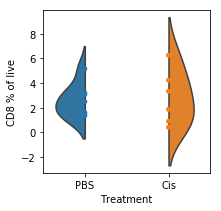

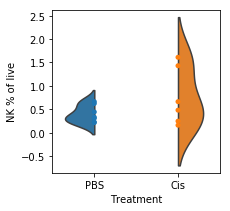

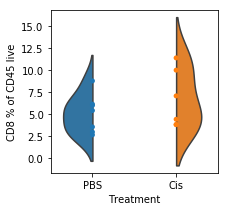

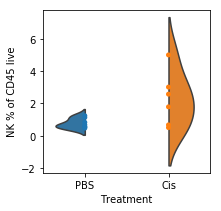

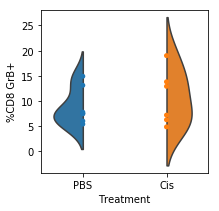

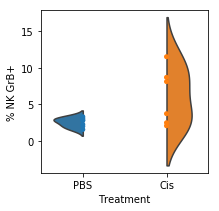

In [39]:
for var in VARS1:
    
    fig = violintplots(var, data)
    
    var_cell = var.replace(" ", "")
    
    file_name = "../../Figures/main/6/panels/6c_NACT_mouse_tumor_%s_comparison_UPK10.pdf" % var_cell
    
    fig.savefig(file_name)

### Figure s6f

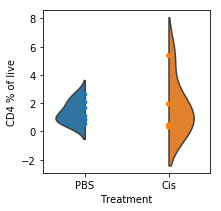

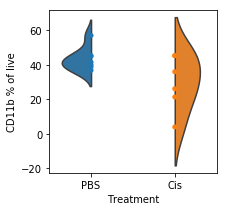

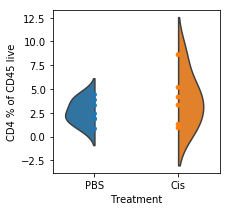

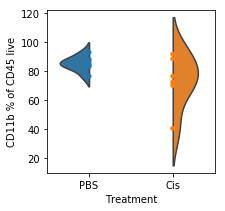

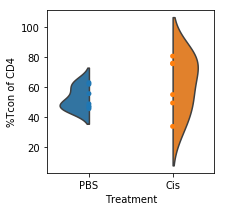

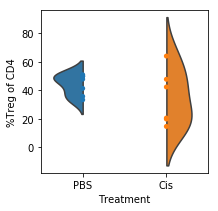

In [40]:
for var in VARS2:
    
    fig = violintplots(var, data)
    
    var_cell = var.replace(" ", "")
    
    file_name = "../../Figures/main/6/panels/s6f_NACT_mouse_tumor_%s_comparison_UPK10.pdf" % var_cell
    
    fig.savefig(file_name)

# End script